In [1]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ravi Kumar KM\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
# Import datset and create a dataframe
nutri=pd.read_csv("C:\\Users\\Ravi Kumar KM\\Downloads\\New folder\\nutrition.dat",sep='\t')
nutri.head()
nutri.tail()

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,GELATIN; DRY 1 ENVELP,7.00,13,25,6,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,3.571429,0.000000,0.857143,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,5,80,16,2,0.8,0.2,0.6,0,...,160,16,0.67,1.04,3.6,3,2.821869,0.285714,0.564374,0.070547
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,5,20,3,0,0.0,0.1,0.0,0,...,0,0,0.16,0.38,2.6,0,2.857143,0.157143,0.428571,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,18,130,12,9,5.4,2.5,0.2,22,...,200,49,0.01,0.11,0.1,0,4.585538,0.010582,0.423280,0.317460
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,18,455,42,30,19.1,8.7,0.7,79,...,700,173,0.05,0.39,0.3,0,4.550000,0.010000,0.420000,0.300000


,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
956,COFFEE; BREWED 6 FL OZ,180.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.02,0.4,0,0.0,0.0,0.0,0.0
957,TEA; BREWED 8 FL OZ,240.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.03,0.0,0,0.0,0.0,0.0,0.0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.02,0.1,0,0.0,0.0,0.0,0.0
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.0,96,0,0,0,0.0,0.0,0.0,0,...,150,15,0.01,0.01,0.0,1,0.0,0.0,0.0,0.0
960,SALT 1 TSP,5.5,0,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.0,0.0,0.0,0.0


In [4]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 26 columns):
FOOD        961 non-null object
WT_GRAMS    961 non-null float64
PC_WATER    961 non-null int64
CALORIES    961 non-null int64
PROTEIN     961 non-null int64
FAT         961 non-null int64
SAT_FAT     961 non-null float64
MONUNSAT    961 non-null float64
POLUNSAT    961 non-null float64
CHOLEST     961 non-null int64
CARBO       961 non-null int64
CALCIUM     961 non-null int64
PHOSPHOR    961 non-null int64
IRON        961 non-null float64
POTASS      961 non-null int64
SODIUM      961 non-null int64
VIT_A_IU    961 non-null int64
VIT_A_RE    961 non-null int64
THIAMIN     961 non-null float64
RIBOFLAV    961 non-null float64
NIACIN      961 non-null float64
ASCORBIC    961 non-null int64
CAL_GRAM    961 non-null float64
IRN_GRAM    961 non-null float64
PRO_GRAM    961 non-null float64
FAT_GRAM    961 non-null float64
dtypes: float64(12), int64(13), object(1)
memory usage: 195.3+ K

In [5]:
nutri.keys()
nutri.shape

Index(['FOOD', 'WT_GRAMS', 'PC_WATER', 'CALORIES', 'PROTEIN', 'FAT', 'SAT_FAT',
       'MONUNSAT', 'POLUNSAT', 'CHOLEST', 'CARBO', 'CALCIUM', 'PHOSPHOR',
       'IRON', 'POTASS', 'SODIUM', 'VIT_A_IU', 'VIT_A_RE', 'THIAMIN',
       'RIBOFLAV', 'NIACIN', 'ASCORBIC', 'CAL_GRAM', 'IRN_GRAM', 'PRO_GRAM',
       'FAT_GRAM'],
      dtype='object')

(961, 26)

In [6]:
nutri.describe()

,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.00000,961.000000,...,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,149.409365,54.783559,270.444329,7.232050,12.499480,3.987617,4.892716,2.829344,32.55359,34.008325,...,1043.043704,149.132154,0.166691,0.198783,1.909469,11.156087,2.253288,0.020796,0.069961,0.119336
std,175.909357,32.004378,542.917360,10.122852,33.144888,10.744359,14.057466,11.536162,119.96059,78.498553,...,3855.125013,509.403802,0.307198,0.361546,3.186849,31.952155,1.935664,0.050892,0.089936,0.204466
min,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,27.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.00000,3.000000,...,0.000000,0.000000,0.030000,0.040000,0.200000,0.000000,0.602410,0.003030,0.008333,0.000000
50%,113.000000,63.000000,125.000000,3.000000,2.000000,0.400000,0.400000,0.300000,0.00000,14.000000,...,60.000000,11.000000,0.070000,0.090000,0.800000,0.000000,1.842105,0.009200,0.033333,0.032000
75%,218.000000,85.000000,230.000000,8.000000,10.000000,3.300000,3.600000,1.300000,20.00000,31.000000,...,500.000000,82.000000,0.160000,0.190000,2.000000,7.000000,3.409091,0.021000,0.094714,0.138776
max,1542.000000,100.000000,6175.000000,74.000000,328.000000,119.900000,159.200000,162.400000,2053.00000,783.000000,...,54040.000000,9120.000000,3.190000,3.520000,27.600000,504.000000,9.024390,0.634921,0.857143,1.000000


In [7]:
# correlation Matrix
x=nutri.corr()
x

,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
WT_GRAMS,1.000000,0.213088,0.797826,0.548905,0.543990,0.593638,0.488131,0.310398,0.550223,0.830359,...,0.122716,0.150077,0.535625,0.631759,0.411246,0.222238,-0.194675,-0.147922,-0.203789,-0.148356
PC_WATER,0.213088,1.000000,-0.240855,-0.091110,-0.283229,-0.184682,-0.289165,-0.245495,-0.061635,-0.150542,...,0.152437,0.079504,-0.200703,-0.121021,-0.166422,0.229410,-0.876872,-0.335379,-0.297195,-0.543113
CALORIES,0.797826,-0.240855,1.000000,0.611262,0.859832,0.775544,0.803851,0.616262,0.639030,0.880859,...,0.041809,0.115645,0.626124,0.641116,0.496495,0.103055,0.277819,-0.045446,-0.025859,0.219927
PROTEIN,0.548905,-0.091110,0.611262,1.000000,0.408546,0.434203,0.391242,0.206011,0.545807,0.563307,...,0.005023,0.067039,0.629139,0.701017,0.690170,0.003115,0.069644,-0.016360,0.483855,-0.007592
FAT,0.543990,-0.283229,0.859832,0.408546,1.000000,0.827506,0.933939,0.805461,0.546528,0.524019,...,0.039719,0.129298,0.353304,0.395662,0.267988,0.027345,0.444639,-0.056630,-0.009109,0.496751
SAT_FAT,0.593638,-0.184682,0.775544,0.434203,0.827506,1.000000,0.715294,0.431540,0.696718,0.535705,...,0.060748,0.168087,0.275512,0.476369,0.211263,-0.004317,0.297396,-0.068239,-0.006329,0.330109
MONUNSAT,0.488131,-0.289165,0.803851,0.391242,0.933939,0.715294,1.000000,0.652721,0.479330,0.491890,...,0.031949,0.110390,0.366642,0.354720,0.274585,0.049216,0.440509,-0.042894,0.008788,0.487435
POLUNSAT,0.310398,-0.245495,0.616262,0.206011,0.805461,0.431540,0.652721,1.000000,0.232034,0.298884,...,0.013366,0.061310,0.234862,0.177875,0.175953,0.015022,0.399988,-0.039528,-0.035945,0.459063
CHOLEST,0.550223,-0.061635,0.639030,0.545807,0.546528,0.696718,0.479330,0.232034,1.000000,0.542622,...,0.086118,0.199082,0.297622,0.516634,0.258443,0.054163,0.080497,-0.034936,0.091879,0.057864
CARBO,0.830359,-0.150542,0.880859,0.563307,0.524019,0.535705,0.491890,0.298884,0.542622,1.000000,...,0.038022,0.074610,0.690076,0.670239,0.533402,0.170113,0.061202,-0.021778,-0.104712,-0.079331


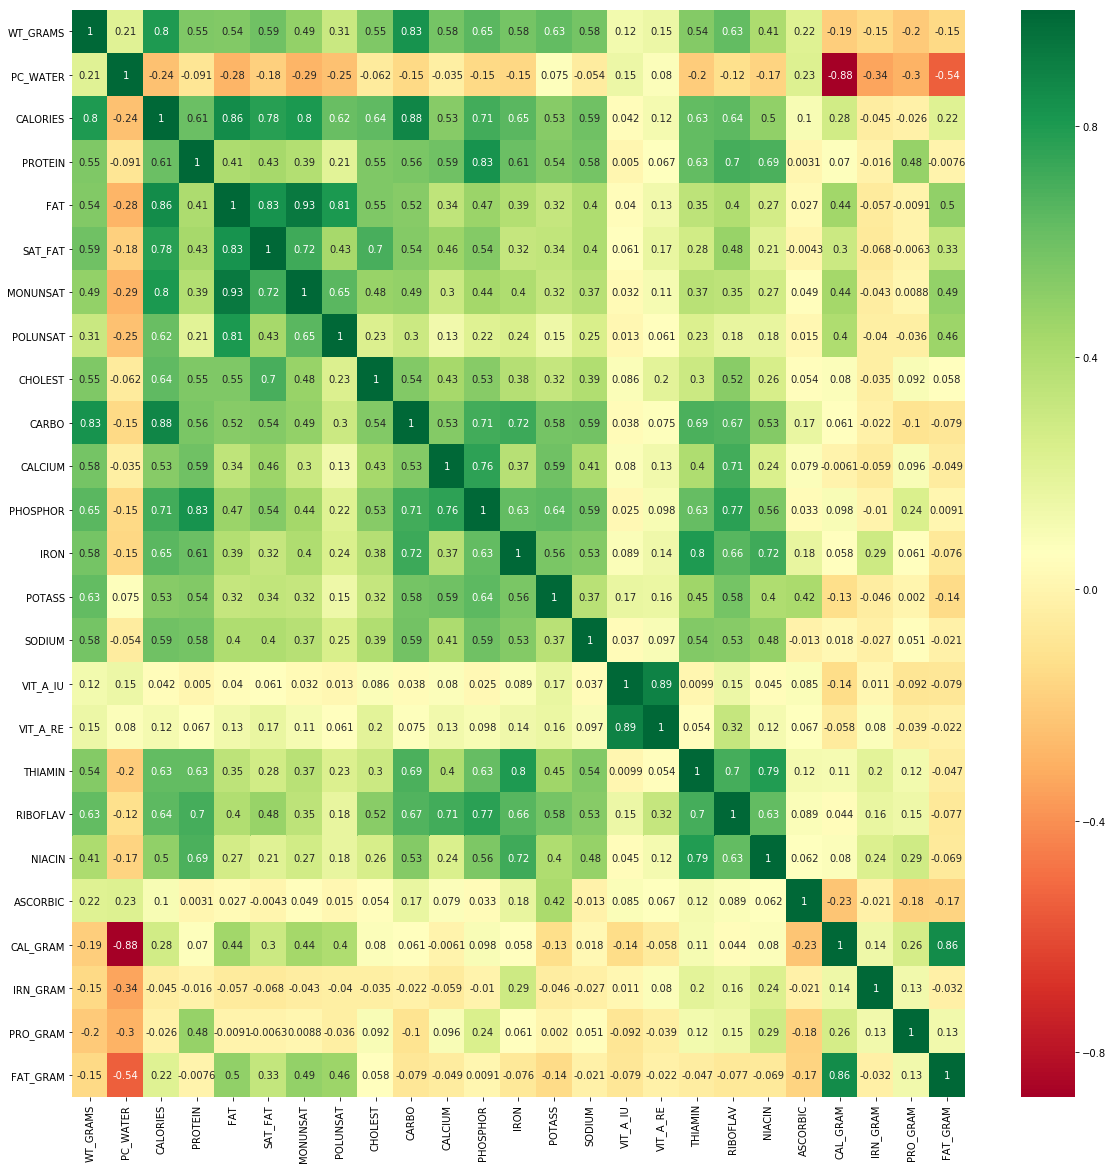

In [8]:
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

# Top Five Observations

In [9]:
1. #Check any null values
nutri.isnull()

1.0

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
2.# Food having Zero calories food
calorie_zero=nutri[nutri.CALORIES==0]
calorie_zero


2.0

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
806,PARSLEY; FREEZE-DRIED 1 TBSP,0.4,2,0,0,0,0.0,0.0,0.0,0,...,250,25,0.00,0.01,0.0,1,0.0,0.500000,0.0,0.0
840,VINEGAR; CIDER 1 TBSP,15.0,94,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.0,0.006667,0.0,0.0
880,COLA; DIET; ASPRTAME + SACCHRN12 FL OZ,355.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.0,0.000563,0.0,0.0
881,COLA; DIET; SACCHARIN ONLY 12 FL OZ,355.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.0,0.000563,0.0,0.0
882,COLA; DIET; ASPARTAME ONLY 12 FL OZ,355.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.0,0.000563,0.0,0.0
883,COFFEE; INSTANT; PREPARED 6 FL OZ,182.0,99,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.03,0.6,0,0.0,0.000549,0.0,0.0
955,CLUB SODA 12 FL OZ,355.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.0,0.000000,0.0,0.0
956,COFFEE; BREWED 6 FL OZ,180.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.02,0.4,0,0.0,0.000000,0.0,0.0
957,TEA; BREWED 8 FL OZ,240.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.03,0.0,0,0.0,0.000000,0.0,0.0
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.0,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.02,0.1,0,0.0,0.000000,0.0,0.0


In [11]:
3.# Food having high calories 
calorie_high=nutri.sort_values(by='CALORIES',ascending=False)
calorie_high

3.0

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.0,23,6175,63,328,66.0,135.2,107.5,1183,...,2240,246,1.83,1.97,14.7,23,4.020182,0.013672,0.041016,0.213542
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,1361.0,18,5185,74,228,47.6,113.0,51.7,640,...,1720,422,2.41,2.55,17.0,504,3.809699,0.027627,0.054372,0.167524
445,WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE,1140.0,24,4170,43,148,33.1,61.6,42.2,46,...,640,194,3.19,2.05,27.6,0,3.657895,0.013596,0.037719,0.129825
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,1096.0,21,4020,37,129,41.6,50.4,26.3,636,...,2190,647,1.21,1.42,9.9,2,3.667883,0.010036,0.033759,0.117701
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,23,3895,40,175,92.0,58.7,10.0,609,...,1850,488,0.78,2.22,10.0,0,3.515343,0.017960,0.036101,0.157942
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,1107.0,24,3755,49,136,55.6,51.4,19.7,598,...,1660,498,1.11,1.66,10.0,1,3.392051,0.019964,0.044264,0.122855
423,YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE,1108.0,26,3735,45,125,47.8,48.8,21.8,576,...,1550,465,1.22,1.66,11.1,1,3.370939,0.013989,0.040614,0.112816
386,PECAN PIE 1 PIE,825.0,20,3450,42,189,28.1,101.5,47.0,569,...,1320,322,1.82,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091
378,CHEESECAKE 1 CAKE,1110.0,46,3350,60,213,119.9,65.5,14.4,2053,...,2820,833,0.33,1.44,5.1,56,3.018018,0.004775,0.054054,0.191892
406,SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE,777.0,25,2830,35,108,29.5,45.1,25.6,552,...,1320,373,1.24,1.40,10.1,2,3.642214,0.015058,0.045045,0.138996


In [12]:
4.# Food having high carbo 
carbo_high=nutri.sort_values(by='CARBO',ascending=False)
carbo_high

4.0

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,1361.00,18,5185,74,228,47.6,113.0,51.7,640,...,1720,422,2.41,2.55,17.0,504,3.809699,0.027627,0.054372,0.167524
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.00,23,6175,63,328,66.0,135.2,107.5,1183,...,2240,246,1.83,1.97,14.7,23,4.020182,0.013672,0.041016,0.213542
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,1096.00,21,4020,37,129,41.6,50.4,26.3,636,...,2190,647,1.21,1.42,9.9,2,3.667883,0.010036,0.033759,0.117701
445,WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE,1140.00,24,4170,43,148,33.1,61.6,42.2,46,...,640,194,3.19,2.05,27.6,0,3.657895,0.013596,0.037719,0.129825
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,1107.00,24,3755,49,136,55.6,51.4,19.7,598,...,1660,498,1.11,1.66,10.0,1,3.392051,0.019964,0.044264,0.122855
423,YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE,1108.00,26,3735,45,125,47.8,48.8,21.8,576,...,1550,465,1.22,1.66,11.1,1,3.370939,0.013989,0.040614,0.112816
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.00,23,3895,40,175,92.0,58.7,10.0,609,...,1850,488,0.78,2.22,10.0,0,3.515343,0.017960,0.036101,0.157942
696,SHERBET; 2% FAT 1/2 GAL,1542.00,66,2160,17,31,19.0,8.8,1.1,113,...,1480,308,0.26,0.71,1.0,31,1.400778,0.001621,0.011025,0.020104
406,SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE,777.00,25,2830,35,108,29.5,45.1,25.6,552,...,1320,373,1.24,1.40,10.1,2,3.642214,0.015058,0.045045,0.138996
386,PECAN PIE 1 PIE,825.00,20,3450,42,189,28.1,101.5,47.0,569,...,1320,322,1.82,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091


In [13]:
4.# Food having high carbo which is positevly corelated with calories 
carbo_high=nutri.sort_values(by='CARBO',ascending=False)
carbo_high

4.0

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,1361.00,18,5185,74,228,47.6,113.0,51.7,640,...,1720,422,2.41,2.55,17.0,504,3.809699,0.027627,0.054372,0.167524
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.00,23,6175,63,328,66.0,135.2,107.5,1183,...,2240,246,1.83,1.97,14.7,23,4.020182,0.013672,0.041016,0.213542
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,1096.00,21,4020,37,129,41.6,50.4,26.3,636,...,2190,647,1.21,1.42,9.9,2,3.667883,0.010036,0.033759,0.117701
445,WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE,1140.00,24,4170,43,148,33.1,61.6,42.2,46,...,640,194,3.19,2.05,27.6,0,3.657895,0.013596,0.037719,0.129825
410,DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CAKE,1107.00,24,3755,49,136,55.6,51.4,19.7,598,...,1660,498,1.11,1.66,10.0,1,3.392051,0.019964,0.044264,0.122855
423,YELLOW CAKE W/ CHOC FRST;FRMIX1 CAKE,1108.00,26,3735,45,125,47.8,48.8,21.8,576,...,1550,465,1.22,1.66,11.1,1,3.370939,0.013989,0.040614,0.112816
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.00,23,3895,40,175,92.0,58.7,10.0,609,...,1850,488,0.78,2.22,10.0,0,3.515343,0.017960,0.036101,0.157942
696,SHERBET; 2% FAT 1/2 GAL,1542.00,66,2160,17,31,19.0,8.8,1.1,113,...,1480,308,0.26,0.71,1.0,31,1.400778,0.001621,0.011025,0.020104
406,SHEETCAKE W/O FRSTNG;HOMERECIP1 CAKE,777.00,25,2830,35,108,29.5,45.1,25.6,552,...,1320,373,1.24,1.40,10.1,2,3.642214,0.015058,0.045045,0.138996
386,PECAN PIE 1 PIE,825.00,20,3450,42,189,28.1,101.5,47.0,569,...,1320,322,1.82,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091


In [14]:
5.# Food having high cal_gram which is negatively correlated
PC_WATER_high=nutri.sort_values(by='PC_WATER',ascending=False)
PC_WATER_high

5.0

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.02,0.1,0,0.000000,0.000000,0.000000,0.000000
882,COLA; DIET; ASPARTAME ONLY 12 FL OZ,355.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.000000,0.000563,0.000000,0.000000
881,COLA; DIET; SACCHARIN ONLY 12 FL OZ,355.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.000000,0.000563,0.000000,0.000000
957,TEA; BREWED 8 FL OZ,240.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.03,0.0,0,0.000000,0.000000,0.000000,0.000000
956,COFFEE; BREWED 6 FL OZ,180.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.02,0.4,0,0.000000,0.000000,0.000000,0.000000
955,CLUB SODA 12 FL OZ,355.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.000000,0.000000,0.000000,0.000000
880,COLA; DIET; ASPRTAME + SACCHRN12 FL OZ,355.00,100,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,0.000000,0.000563,0.000000,0.000000
883,COFFEE; INSTANT; PREPARED 6 FL OZ,182.00,99,0,0,0,0.0,0.0,0.0,0,...,0,0,0.00,0.03,0.6,0,0.000000,0.000549,0.000000,0.000000
674,BEEF BROTH; BOULLN; CONSM;CNND1 CUP,240.00,98,15,3,1,0.3,0.2,0.0,0,...,0,0,0.00,0.05,1.9,0,0.062500,0.001667,0.012500,0.004167
764,ONION SOUP; DEHYDRATD; PREPRED1 PKT,184.00,96,20,1,0,0.1,0.2,0.1,0,...,0,0,0.02,0.04,0.4,0,0.108696,0.000543,0.005435,0.000000


In [15]:
x1=nutri.drop('CALORIES',1)
x=x1.drop('FOOD',1)
y=nutri['CALORIES']
x.head()
y.head()

,WT_GRAMS,PC_WATER,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,CALCIUM,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,7.00,13,6,0,0.0,0.0,0.0,0,0,1,...,0,0,0.00,0.00,0.0,0,3.571429,0.000000,0.857143,0.000000
1,28.35,5,16,2,0.8,0.2,0.6,0,7,34,...,160,16,0.67,1.04,3.6,3,2.821869,0.285714,0.564374,0.070547
2,7.00,5,3,0,0.0,0.1,0.0,0,3,3,...,0,0,0.16,0.38,2.6,0,2.857143,0.157143,0.428571,0.000000
3,28.35,18,12,9,5.4,2.5,0.2,22,1,390,...,200,49,0.01,0.11,0.1,0,4.585538,0.010582,0.423280,0.317460
4,100.00,18,42,30,19.1,8.7,0.7,79,4,1376,...,700,173,0.05,0.39,0.3,0,4.550000,0.010000,0.420000,0.300000


0     25
1     80
2     20
3    130
4    455
Name: CALORIES, dtype: int64

In [16]:
# create train and test data with 75% train and 25% test splits
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(720, 24)

(241, 24)

(720,)

(241,)

In [17]:
#let's import the regression object and define model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#Fit a model into train data
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#Evaluate the model
predict_test=lm.predict(test_x)

In [20]:
#R2 Value
print("RSquare Value for TEST data is-")
np.round(lm.score(test_x,test_y)*100,0)
print("RSquare Value for TRAIN data is-")
np.round(lm.score(train_x,train_y)*100,0)

RSquare Value for TEST data is-


100.0

RSquare Value for TRAIN data is-


100.0

In [21]:
#Print the loss Function-MSE
import numpy as np
from sklearn import metrics
print ("Mean Square Error(MSE)for TEST data is")
np.round(metrics.mean_squared_error(test_y,predict_test),0)

Mean Square Error(MSE)for TEST data is


372.0

In [22]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) for TEST data is")
np.round(mean_absolute_error(test_y,predict_test),0)

Mean Absolute Error(MAE) for TEST data is


9.0

In [23]:
#Append Data
fdf=pd.concat([test_x,test_y],1)
fdf.head()


,WT_GRAMS,PC_WATER,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,CALCIUM,...,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM,CALORIES
241,454.0,34,43,18,3.8,5.7,5.9,0,230,499,...,0,2.09,1.59,18.2,0,2.797357,0.030837,0.094714,0.039648,1270
852,85.0,78,0,0,0.0,0.0,0.0,0,18,8,...,105,0.02,0.02,0.3,3,0.823529,0.003529,0.000000,0.000000,70
436,283.0,74,11,9,5.3,2.5,0.3,33,50,413,...,79,0.08,0.55,0.4,0,1.113074,0.001060,0.038869,0.031802,315
386,825.0,20,42,189,28.1,101.5,47.0,569,423,388,...,322,1.82,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091,3450
345,30.0,22,2,5,1.2,2.4,1.6,32,15,20,...,60,0.05,0.06,0.5,0,4.000000,0.016667,0.066667,0.166667,120


In [24]:
fdf['Predicted']=np.round(predict_test,1)
fdf['Predicted']
fdf.head()

241    1277.9
852      70.6
436     322.6
386    3457.8
345     114.9
311      86.1
875     187.4
267    1219.7
35       81.9
78       49.9
604     165.5
347      74.5
191     346.4
104     110.4
711     808.6
754      35.1
101      98.0
790     162.3
926      21.5
94      145.9
228     162.5
388     194.0
828       2.7
90       66.2
672     118.7
681      95.3
248     261.5
370     314.1
34      164.4
809       6.6
        ...  
355    1456.9
855     104.3
663     234.2
135     381.6
610      41.6
160     306.9
567     181.5
571     301.2
957       6.1
525     189.5
871     142.5
453     133.9
107      25.9
202     122.2
49      172.3
889     166.7
690      93.9
121     164.8
699      26.6
187     141.2
108     174.1
679     116.0
649      85.2
598     276.9
16      213.4
543     141.8
582      20.8
782     129.2
307     588.3
354     312.6
Name: Predicted, Length: 241, dtype: float64

,WT_GRAMS,PC_WATER,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,CALCIUM,...,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM,CALORIES,Predicted
241,454.0,34,43,18,3.8,5.7,5.9,0,230,499,...,2.09,1.59,18.2,0,2.797357,0.030837,0.094714,0.039648,1270,1277.9
852,85.0,78,0,0,0.0,0.0,0.0,0,18,8,...,0.02,0.02,0.3,3,0.823529,0.003529,0.000000,0.000000,70,70.6
436,283.0,74,11,9,5.3,2.5,0.3,33,50,413,...,0.08,0.55,0.4,0,1.113074,0.001060,0.038869,0.031802,315,322.6
386,825.0,20,42,189,28.1,101.5,47.0,569,423,388,...,1.82,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091,3450,3457.8
345,30.0,22,2,5,1.2,2.4,1.6,32,15,20,...,0.05,0.06,0.5,0,4.000000,0.016667,0.066667,0.166667,120,114.9


In [25]:
fdf['Prediction_Error']=fdf['CALORIES']-fdf['Predicted']
fdf['Prediction_Error']

241    -7.9
852    -0.6
436    -7.6
386    -7.8
345     5.1
311    -1.1
875    -7.4
267    -9.7
35     -1.9
78     -4.9
604    -5.5
347     0.5
191    -6.4
104     4.6
711     1.4
754    -0.1
101     7.0
790    -7.3
926    -6.5
94      4.1
228    -7.5
388     1.0
828     2.3
90      3.8
672     1.3
681   -10.3
248     8.5
370    -9.1
34      0.6
809    -1.6
       ... 
355    28.1
855    -4.3
663     5.8
135    -6.6
610     8.4
160    -6.9
567   -16.5
571    38.8
957    -6.1
525     0.5
871     2.5
453    -8.9
107    -5.9
202   -12.2
49     12.7
889    -6.7
690    -8.9
121     0.2
699    -1.6
187    -1.2
108     0.9
679    -1.0
649    -5.2
598    23.1
16      6.6
543     3.2
582    -0.8
782    -4.2
307    11.7
354    -2.6
Name: Prediction_Error, Length: 241, dtype: float64

In [26]:
fdf.head()

,WT_GRAMS,PC_WATER,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,CALCIUM,...,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM,CALORIES,Predicted,Prediction_Error
241,454.0,34,43,18,3.8,5.7,5.9,0,230,499,...,1.59,18.2,0,2.797357,0.030837,0.094714,0.039648,1270,1277.9,-7.9
852,85.0,78,0,0,0.0,0.0,0.0,0,18,8,...,0.02,0.3,3,0.823529,0.003529,0.000000,0.000000,70,70.6,-0.6
436,283.0,74,11,9,5.3,2.5,0.3,33,50,413,...,0.55,0.4,0,1.113074,0.001060,0.038869,0.031802,315,322.6,-7.6
386,825.0,20,42,189,28.1,101.5,47.0,569,423,388,...,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091,3450,3457.8,-7.8
345,30.0,22,2,5,1.2,2.4,1.6,32,15,20,...,0.06,0.5,0,4.000000,0.016667,0.066667,0.166667,120,114.9,5.1


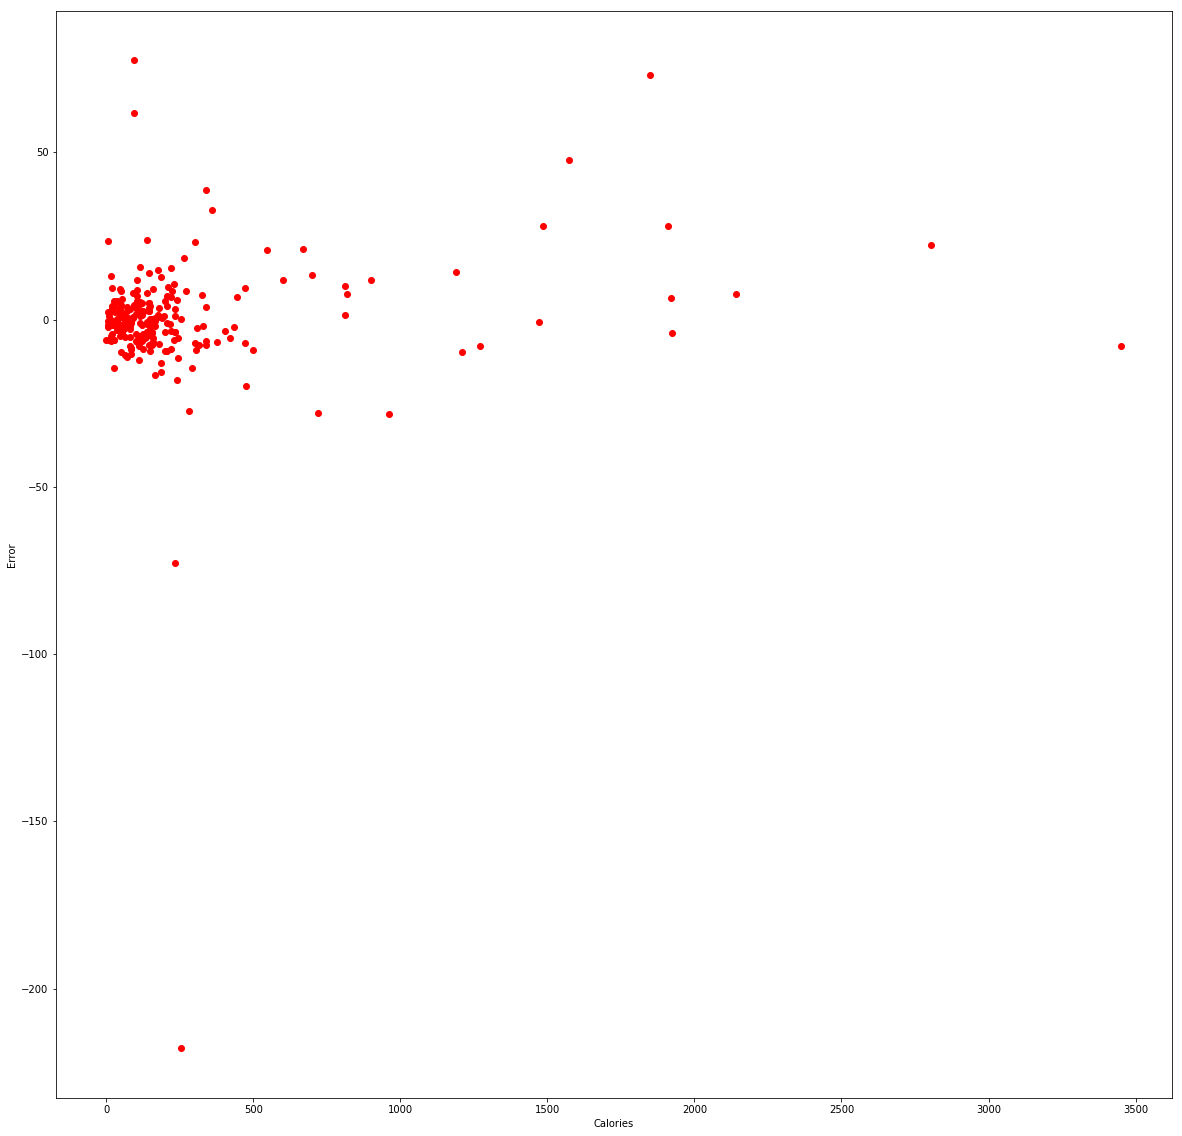

In [27]:
plt.subplots(figsize=(20,20))
plt.scatter(fdf.CALORIES,fdf.Prediction_Error,color='red')
plt.xlabel('Calories')
plt.ylabel("Error")
plt.show();

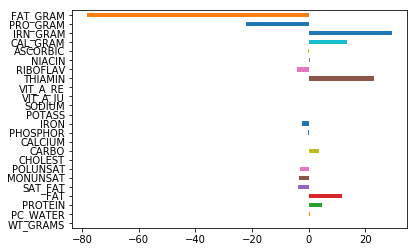

In [28]:
ft_importances =pd.Series(lm.coef_,index=x.columns)
ft_importances.plot(kind='barh')
plt.show();